# NLP Project: Resume Screening with Deep Learning using TensorFlow

## Introduction
In this project, we aim to develop a resume screening system using deep learning techniques implemented in TensorFlow. Resume screening is a crucial task for many organizations to efficiently filter job applications based on predefined criteria. By leveraging deep learning and NLP, we can automate this process to save time and resources.

In [1]:
import pandas as pd

In [2]:
# Turn .csv files into pandas DataFrame's
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
# Shuffle training dataframe
df_shuffled = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
df_shuffled.head()

,Category,Resume
344,Java Developer,TECHNICAL SKILLS Programming Languages: Java (...
381,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja..."
351,Java Developer,Education Details \r\nJanuary 2013 Master of E...
778,Hadoop,"Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo..."
277,Health and fitness,Education Details \r\nJanuary 1992 to January ...


In [4]:
# How many examples of each class?
df.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [5]:
import plotly.express as px

def dispay_expamples():
  # Count the examples of each class
  category_counts = df['Category'].value_counts()

  # Create a pie chart
  fig = px.pie(category_counts, values=category_counts.values, names=category_counts.index,
              title='Distribution of Categories',
              labels={'value': 'Count', 'names': 'Category'},
              hole=0.4)

  # Show the pie chart
  fig.show()

dispay_expamples()

In [6]:
# How many samples total?
len(df), len(df) , f"Total number of samples {len(df) + len(df)}"

(962, 962, 'Total number of samples 1924')

In [7]:
# Let's visualize some random resume examples
for i in range(3):
    random_sample = df_shuffled.sample(1)
    resume_text = random_sample['Resume'].values[0]
    category = random_sample['Category'].values[0]

    print(f"Category: '{category}'")
    print(f"Resume:\n'{resume_text}'\n")
    print("--------------------------")

Category: 'DevOps Engineer'
Resume:
'CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbucket ~ Jenkins ~ Linux ~ Ansible ~ Shell Scripting ~Requirement Gathering ~Continuous Integration and Continuous Deployment ~ Software Development Life Cycle ~ Software Testing Life Cycle ~ Documentation & Reporting ~ Test Reports IT SKILLS â¢ Primary Skills: Dev-ops methodologies â¢ Programming Languages: C, Core Java â¢ Version Controls: GIT, Bitbucket â¢ Build Tools: ANT, Maven â¢ CI/CD Tools: Jenkins â¢ Configuration management: Ansible â¢ Scripting: Shell Script â¢ Application Servers: Apache Tomcat serverEducation Details 
June 2015 to June 2017 Masters of science information technology Hyderabad, Telangana JNTU
Devops Engineer 

Devops Engineer - Nendrasys Technologies Pvt Ltd
Skill Details 
DEPLOYMENT- Exprience - 27 months
Git- Exprience - 27 months
DOCUMENTATION- Exprience - 26 months
CHANGE MANAGEMENT- Exprience - 10 months
CONFIGURATION MANAGEMENT- Exprience - 10 monthsCompany Details 

##Split data into training and validation sets

In [8]:
df_shuffled.head(2)

,Category,Resume
344,Java Developer,TECHNICAL SKILLS Programming Languages: Java (...
381,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja..."


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df_shuffled['Resume'].to_numpy()
y = df_shuffled['Category'].to_numpy()

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (80% train, 20% test)
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

In [10]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(865, 865, 97, 97)

In [11]:
# Get the class names
class_names = label_encoder.classes_

# Print the class names
print("Class names:", class_names)

Class names: ['Advocate' 'Arts' 'Automation Testing' 'Blockchain' 'Business Analyst'
 'Civil Engineer' 'Data Science' 'Database' 'DevOps Engineer'
 'DotNet Developer' 'ETL Developer' 'Electrical Engineering' 'HR' 'Hadoop'
 'Health and fitness' 'Java Developer' 'Mechanical Engineer'
 'Network Security Engineer' 'Operations Manager' 'PMO' 'Python Developer'
 'SAP Developer' 'Sales' 'Testing' 'Web Designing']


In [12]:
# View the first 5 training sentences and their labels
train_sentences[2], train_labels[2]

('Education Details \r\nJanuary 2016 B.Sc. Information Technology Mumbai, Maharashtra University of Mumbai\r\nJanuary 2012 HSC  Allahabad, Uttar Pradesh Allahabad university\r\nJanuary 2010 SSC dot Net Allahabad, Uttar Pradesh Allahabad university\r\nWeb designer and Developer Trainer \r\n\r\nWeb designer and Developer\r\nSkill Details \r\nWeb design- Exprience - 12 months\r\nPhp- Exprience - 12 monthsCompany Details \r\ncompany - NetTech India\r\ndescription - Working. ( salary - 12k)\r\nPERSONAL INTEREST\r\n\r\nListening to Music, Surfing net, Watching Movie, Playing Cricket.\r\ncompany - EPI Center Academy\r\ndescription - Working.  ( Salary Contract based)\r\ncompany - Aptech Charni Road\r\ndescription - Salary Contract based)',
 24)

In [13]:
print(class_names[train_labels[2]])

Web Designing


##Converting text into numbers
The dataset is slited into training and validation set containing Resume and Category

###Text vectorization (tokenization)

To tokenize our words, we'll use the helpful preprocessing layer [`tf.keras.layers.experimental.preprocessing.TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization).

The `TextVectorization` layer takes the following parameters:
* `max_tokens` - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
* `standardize` - Method for standardizing text. Default is `"lower_and_strip_punctuation"` which lowers text and removes all punctuation marks.
* `split` - How to split text, default is `"whitespace"` which splits on spaces.
* `ngrams` - How many words to contain per token split, for example, `ngrams=2` splits tokens into continuous sequences of 2.
* `output_mode` -  How to output tokens, can be `"int"` (integer mapping), `"binary"` (one-hot encoding), `"count"` or `"tf-idf"`. See documentation for more.
* `output_sequence_length` - Length of tokenized sequence to output. For example, if `output_sequence_length=150`, all tokenized sequences will be 150 tokens long.
* `pad_to_max_tokens` - Defaults to `False`, if `True`, the output feature axis will be padded to `max_tokens` even if the number of unique tokens in the vocabulary is less than `max_tokens`. Only valid in certain modes, see docs for more.

Let's see it in action.

In [14]:
import numpy as np

In [15]:
# How long is each sentence on average?
sentence_len = [len(sentence.split()) for sentence in train_sentences]
avg_sentence_lenght = np.mean(sentence_len)
avg_sentence_lenght # return average sentence length (in tokens)

447.4150289017341

(array([447., 229., 102.,  42.,  12.,  14.,  19.]),
 array([  19.        ,  331.85714286,  644.71428571,  957.57142857,
        1270.42857143, 1583.28571429, 1896.14285714, 2209.        ]),
 <BarContainer object of 7 artists>)

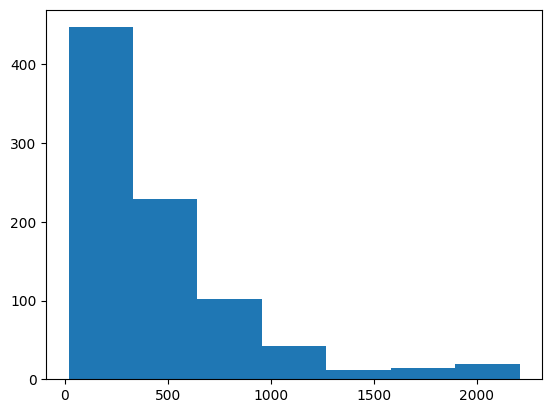

In [16]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sentence_len, bins=7)

In [17]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sentence_len, 95))
output_seq_len

1322

Wonderful! It looks like 95% of the sentences in our training set have a length of 1322 tokens or less.

In [18]:
max(sentence_len)

2209

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of unique words to have in our vocabulary
max_length = 1322 # how many words from an email does our model see?

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_sequence_length=max_length)

In [20]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [21]:
# Create sample sentence and tokenize it
text_vectorizer(['I am learnig the deep learnign.'])

<tf.Tensor: shape=(1, 1322), dtype=int64, numpy=array([[109, 794,   1, ...,   0,   0,   0]])>

In [22]:
import random
random_sentence = random.choice(train_sentences)

print(f"Original Sentence:\n{random_sentence}\n\nVertorized Version:")
text_vectorizer([random_sentence])

Original Sentence:
Education Details 
June 2014 to June 2018 BE Mechanical Engineering Pune, Maharashtra Savitribai Phule Pune University
Mechanical Design Engineer 

Mechanical design engineer
Skill Details 
Microsoft office, Autocad, Catia, Solidworks- Exprience - 6 monthsCompany Details 
company - Push Engineering Pvt ltd
description - Currently I am working as mechanical design engineer in Push engineering Pvt ltd. All types of ice making plant are designed and manufactured in our company. Design includes design of pressure vessel ,condenser, conveyor with the help of 3d modelling software. Also BOM Preparation of material.ERP System.
company - Central Water and Power Research Station
description - Pune)
(Govt. of India)

1 year experience as a Research assistant of R&D Department of mechanical workshop at
Central Water and Power Research Station, Khadakwasla, Pune (Govt. of india)
â¢ Experiences different project of generation of sea waves in laboratory useful for design of port 

<tf.Tensor: shape=(1, 1322), dtype=int64, numpy=array([[ 79,  15, 216, ...,   0,   0,   0]])>

In [23]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 8206
Top 5 most common words: ['', '[UNK]', 'and', 'â\x80¢', 'the']
Bottom 5 least common words: ['20062007', '18aug2012', '16aug2012', '130', '07112016']


### Creating an Embedding using an Embedding Layer

We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. `1` = I, `2` = love, `3` = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer.

The main parameters we're concerned about here are:
* `input_dim` - The size of the vocabulary (e.g. `len(text_vectorizer.get_vocabulary()`).
* `output_dim` - The size of the output embedding vector, for example, a value of `100` outputs a  feature vector of size 100 for each word.
* `embeddings_initializer` - How to initialize the embeddings matrix, default is `"uniform"` which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* `input_length` - Length of sequences being passed to embedding layer.

Knowing these, let's make an embedding layer.

In [24]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=len(words_in_vocab), # set input shape
                             output_dim=128,  # Greater the embedding size more the model learns. Note: different embedding sizes result in drastically different numbers of parameters to train
                             embeddings_initializer="uniform", # Allowing the model to learn and adjust them during training to better represent the relationships between words in the input data.
                             mask_zero=True, # it will ignore the zero values in the input sequence
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [25]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original Sentence:\n{random_sentence}\n\nEmbedded Version:")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Sentence:
Additional qualifications April 2000, Web Designing Course with above average computer skillsEducation Details 
January 2000 to January 2001 Bachelor of Arts Sociology Mumbai, Maharashtra The Mumbai University
January 1998 to January 2000 Bachelor of Arts Sociology  Sophia College
January 1997 to January 1998 H.S.C.   Sophia College
January 1995 to January 1996 S.S.C.   St. Teresa's Convent High School
Head business development, arts 

Head business development, arts
Skill Details 
Company Details 
company - British Council
description - Responsibilities
Ã± Strategic oversight responsibility for programmes in the performing arts (music, theatre and dance) and other cultural sectors.
Ã± lead on the conception and oversight of specific large-scale programmes within the overall Arts
programme,
Ã± Represent the British Council at external events in India and act as deputy to the Director, Arts when required.
Ã± Oversee and manage resources to deliver compelling communica

<tf.Tensor: shape=(1, 1322, 128), dtype=float32, numpy=
array([[[ 0.02118384,  0.04181837,  0.03726484, ...,  0.01482091,
         -0.01484926,  0.0342477 ],
        [-0.01651285, -0.01501303, -0.02887338, ..., -0.00998875,
          0.0481855 ,  0.01326798],
        [-0.02619445, -0.03025997,  0.0270449 , ..., -0.03507854,
          0.0121728 ,  0.03762909],
        ...,
        [-0.01088107, -0.03300707, -0.02358483, ...,  0.01666269,
         -0.01413558, -0.0463827 ],
        [-0.01088107, -0.03300707, -0.02358483, ...,  0.01666269,
         -0.01413558, -0.0463827 ],
        [-0.01088107, -0.03300707, -0.02358483, ...,  0.01666269,
         -0.01413558, -0.0463827 ]]], dtype=float32)>

Each token in the sentence gets turned into a length 128 feature vector.

In [26]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.02118384,  0.04181837,  0.03726484,  0.00600111, -0.03329053,
       -0.02423852, -0.01448916,  0.03990811, -0.00574349,  0.04694149,
        0.01932127,  0.02194866,  0.0334741 , -0.0391453 ,  0.00789462,
       -0.02127427, -0.02821556,  0.0340266 ,  0.0237368 , -0.01551427,
        0.0358159 ,  0.00941728,  0.01827835,  0.0025233 , -0.04514127,
       -0.02407726, -0.04653548, -0.03966203,  0.01126079, -0.02880392,
        0.00298677, -0.02729853, -0.04475031, -0.04043861,  0.02891273,
        0.03694626, -0.0419804 , -0.02563883, -0.03251145, -0.0251148 ,
       -0.02593621,  0.00419396, -0.03338652, -0.00300116, -0.0218281 ,
        0.01119854,  0.00809609, -0.01074069, -0.00216098,  0.03200854,
       -0.03381853,  0.04066062,  0.03389413, -0.00821741,  0.04053596,
       -0.01154597, -0.04883052,  0.03045378,  0.02158329,  0.03054592,
       -0.02119744, -0.0184186 , -0.02936207, -0.0388904 , -0.03147566,
        0.040830

##Model 0: Getting a baseline

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 84.54%


In [29]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([19, 18, 23, 24, 15, 22, 12, 15, 19, 11, 20, 10, 15, 18,  1, 17, 18,
       15, 22,  1])

##Make a modelling checkpoint

In [30]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

### Creating an evaluation function for our model experiments

* Accuracy
* Precision
* Recall
* F1-score

> 🔑 **Note:** Since we're dealing with a classification problem, the above metrics are the most appropriate. If we were working with a regression problem, other metrics such as MAE (mean absolute error) would be a better choice.

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_results(true_labels, predictions):
    """
    Evaluate a classification model using common metrics.

    Parameters:
    - predictions: Predicted labels from the model
    - true_labels: True labels from the dataset

    Returns:
    - accuracy: Accuracy of the model
    - precision: Precision of the model
    - recall: Recall of the model
    - f1_score: F1 score of the model
    """
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')  # Specify the averaging strategy
    recall = recall_score(true_labels, predictions, average='weighted')  # Specify the averaging strategy
    f1 = f1_score(true_labels, predictions, average='weighted')  # Specify the averaging strategy

    model_results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    return model_results

In [32]:
# Get baseline results
baseline_results = calculate_results(true_labels=val_labels,
                                     predictions=baseline_preds)
baseline_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'accuracy': 0.845360824742268,
 'precision': 0.8735886107020128,
 'recall': 0.845360824742268,
 'f1_score': 0.833906071019473}

### Model 1: LSTM

In [33]:
import datetime

# Create tensorboard callback (need to create a new one for each model)
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [34]:
# Create directory to save TensorBoard logs
SAVE_DIR = 'model_logs'

In [35]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_1")

In [36]:
num_classes = len(class_names)
num_classes

25

In [37]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  # Plot loss
  plt.figure(figsize=(12, 4))
  plt.subplot(1,2,1)
  plt.plot(loss, label='training_loss')
  plt.plot(val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(accuracy, label='training_accuracy')
  plt.plot(val_accuracy, label='val_accuracy')
  plt.title('Accracy')
  plt.xlabel('epochs')
  plt.legend()

In [38]:
# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)  # assuming 'embedding' is your embedding layer
x = layers.LSTM(64)(x)  # return vector for the whole sequence
outputs = layers.Dense(num_classes, activation="softmax")(x)  # using 'num_classes' for the output layer
model_1 = tf.keras.Model(inputs, outputs, name="model_1_LSTM")

In [39]:
# Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [40]:
# Fit model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM"),
                                                                     create_model_checkpoint(model_name='model_1')])

Saving TensorBoard log files to: model_logs/LSTM/20240415-135257
Epoch 1/5
28/28 [==============================] - 18s 457ms/step - loss: 3.1346 - accuracy: 0.2069 - val_loss: 3.0268 - val_accuracy: 0.2887
Epoch 2/5
28/28 [==============================] - 11s 407ms/step - loss: 2.6434 - accuracy: 0.4197 - val_loss: 2.5861 - val_accuracy: 0.4124
Epoch 3/5
28/28 [==============================] - 12s 456ms/step - loss: 1.9978 - accuracy: 0.5827 - val_loss: 2.1389 - val_accuracy: 0.5876
Epoch 4/5
28/28 [==============================] - 11s 400ms/step - loss: 1.4074 - accuracy: 0.8162 - val_loss: 1.5631 - val_accuracy: 0.7216
Epoch 5/5
28/28 [==============================] - 11s 394ms/step - loss: 0.9829 - accuracy: 0.8798 - val_loss: 1.2214 - val_accuracy: 0.8041


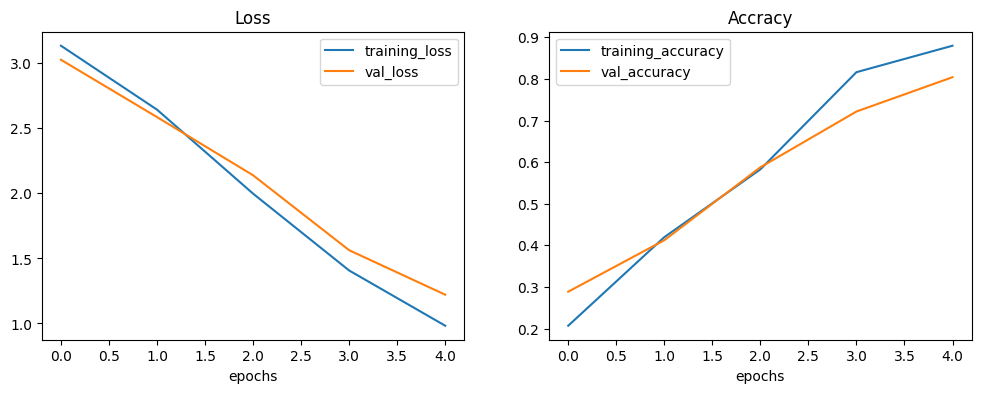

In [41]:
plot_loss_curves(model_1_history)

In [42]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1")
model_1.evaluate(val_sentences, val_labels)

4/4 [==============================] - 1s 26ms/step - loss: 1.2214 - accuracy: 0.8041


[1.2213573455810547, 0.8041236996650696]

In [43]:
# Make predictions
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

4/4 [==============================] - 1s 27ms/step


array([[3.70534211e-02, 4.57956307e-02, 9.95526090e-03, 1.99846234e-02,
        2.89130099e-02, 4.00750451e-02, 9.70638264e-03, 3.43116112e-02,
        1.43569084e-02, 3.59531417e-02, 1.65048409e-02, 1.27908504e-02,
        1.03785032e-02, 1.02901841e-02, 4.86747585e-02, 1.14295296e-02,
        6.28626645e-02, 1.41206667e-01, 8.44350364e-03, 2.79951364e-01,
        2.15544663e-02, 3.31366137e-02, 2.24201754e-02, 6.03169762e-03,
        3.82191949e-02],
       [9.17100057e-04, 1.69664752e-04, 2.41148677e-02, 6.99724304e-03,
        1.09298620e-03, 3.83804523e-04, 7.42429728e-03, 5.08684432e-04,
        2.31835134e-02, 4.80038958e-04, 4.47070779e-04, 1.96800921e-02,
        1.97730958e-03, 8.50278977e-03, 7.82748757e-05, 4.43938933e-03,
        3.60597391e-04, 1.56118040e-04, 8.75733018e-01, 7.89420010e-05,
        2.56004790e-03, 2.44445866e-04, 7.79822143e-03, 1.13641368e-02,
        1.30719913e-03],
       [1.24244229e-03, 5.48618205e-04, 2.70851821e-01, 7.24089611e-03,
        8.8490

In [44]:
# Round out predictions and reduce to 1-dimensional array
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10, 25), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0.

In [45]:
import numpy as np

# Convert predicted probabilities to integer-encoded labels
model_1_preds = np.argmax(model_1_pred_probs, axis=1)
model_1_preds

array([19, 18,  2, 24, 15, 22, 12, 15, 19, 11, 20, 10, 15,  1,  1, 17, 18,
       15, 22,  1,  1, 11, 20, 16, 14, 23,  6, 17, 23, 10,  1, 19,  3, 23,
       22, 21,  5, 12, 24, 10, 12,  8, 10,  7, 17, 19, 11,  1,  2, 13, 19,
       11, 23, 17, 14,  4, 16,  1,  8, 19,  4, 18, 19,  3, 15, 14, 24, 12,
        8,  6, 10, 16, 10, 10,  8, 19, 16,  7, 17, 13,  7, 16, 10, 20, 24,
       23, 16, 19, 23, 18, 19, 12, 14, 22, 14, 24, 11])

##Model 3: GRU

In [46]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

In [47]:
# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_GRU")

In [48]:
# Compile model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [49]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "GRU"),
                                                                     create_model_checkpoint(model_name='model_2')])

Saving TensorBoard log files to: model_logs/GRU/20240415-135430
Epoch 1/5
28/28 [==============================] - 10s 277ms/step - loss: 3.1942 - accuracy: 0.0832 - val_loss: 3.2153 - val_accuracy: 0.0722
Epoch 2/5
28/28 [==============================] - 5s 164ms/step - loss: 3.1314 - accuracy: 0.0971 - val_loss: 3.2348 - val_accuracy: 0.0722
Epoch 3/5
28/28 [==============================] - 6s 231ms/step - loss: 3.0690 - accuracy: 0.1237 - val_loss: 3.1791 - val_accuracy: 0.0722
Epoch 4/5
28/28 [==============================] - 4s 145ms/step - loss: 3.0312 - accuracy: 0.1237 - val_loss: 3.1895 - val_accuracy: 0.0722
Epoch 5/5
28/28 [==============================] - 4s 126ms/step - loss: 3.0254 - accuracy: 0.1249 - val_loss: 3.1807 - val_accuracy: 0.0825


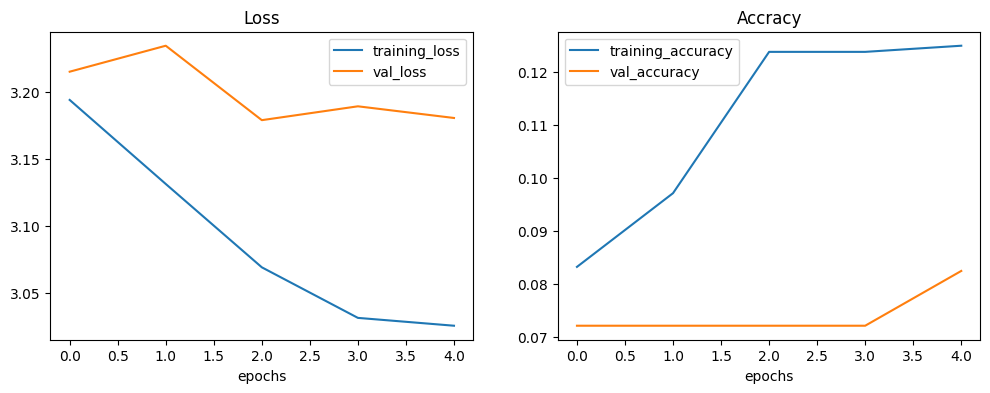

In [50]:
plot_loss_curves(model_2_history)

In [51]:
# Load in saved best performing model_1 and evaluate on test data
model_2 = tf.keras.models.load_model("model_experiments/model_2")
model_2.evaluate(val_sentences, val_labels)

4/4 [==============================] - 1s 32ms/step - loss: 3.1791 - accuracy: 0.0722


[3.179098129272461, 0.07216494530439377]

In [52]:
# Make predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

4/4 [==============================] - 0s 28ms/step


array([[0.02229128, 0.04531756, 0.02686385, 0.04495148, 0.02308025,
        0.02242705, 0.04199897, 0.03633437, 0.05648297, 0.03167919,
        0.03965938, 0.03721853, 0.0473213 , 0.04895432, 0.03270365,
        0.08257076, 0.0448079 , 0.02998848, 0.01038862, 0.02894912,
        0.06207145, 0.02833167, 0.037686  , 0.07058005, 0.04734179],
       [0.02229128, 0.04531756, 0.02686385, 0.04495149, 0.02308025,
        0.02242705, 0.04199897, 0.03633437, 0.05648297, 0.03167919,
        0.03965938, 0.03721853, 0.0473213 , 0.04895432, 0.03270366,
        0.08257076, 0.04480791, 0.02998849, 0.01038862, 0.02894912,
        0.06207145, 0.02833167, 0.03768601, 0.07058006, 0.04734179],
       [0.02229128, 0.04531755, 0.02686385, 0.04495148, 0.02308025,
        0.02242705, 0.04199897, 0.03633437, 0.05648297, 0.03167919,
        0.03965938, 0.03721853, 0.0473213 , 0.04895432, 0.03270365,
        0.08257076, 0.04480791, 0.02998849, 0.01038862, 0.02894912,
        0.06207145, 0.02833167, 0.037686  , 0.

In [53]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10, 25), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0.

In [54]:
# Convert predicted probabilities to integer-encoded labels
model_2_preds = np.argmax(model_2_pred_probs, axis=1)
model_2_preds

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 18,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 18, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 18, 15, 15, 15, 15, 15, 15, 15])

##Model 3: Bidirectional-LSTM model

In [55]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

In [56]:
# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_Bidirectional")

In [57]:
# Compile model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [58]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "GRU"),
                                                                     create_model_checkpoint(model_name='model_3')])

Saving TensorBoard log files to: model_logs/GRU/20240415-135502
Epoch 1/5
28/28 [==============================] - 19s 545ms/step - loss: 3.1580 - accuracy: 0.1225 - val_loss: 3.1070 - val_accuracy: 0.1237
Epoch 2/5
28/28 [==============================] - 14s 523ms/step - loss: 2.7892 - accuracy: 0.2208 - val_loss: 2.6860 - val_accuracy: 0.1443
Epoch 3/5
28/28 [==============================] - 15s 531ms/step - loss: 2.0694 - accuracy: 0.4046 - val_loss: 1.9990 - val_accuracy: 0.5464
Epoch 4/5
28/28 [==============================] - 14s 502ms/step - loss: 1.4648 - accuracy: 0.7121 - val_loss: 1.4750 - val_accuracy: 0.6907
Epoch 5/5
28/28 [==============================] - 15s 544ms/step - loss: 0.9622 - accuracy: 0.8486 - val_loss: 1.0468 - val_accuracy: 0.7938


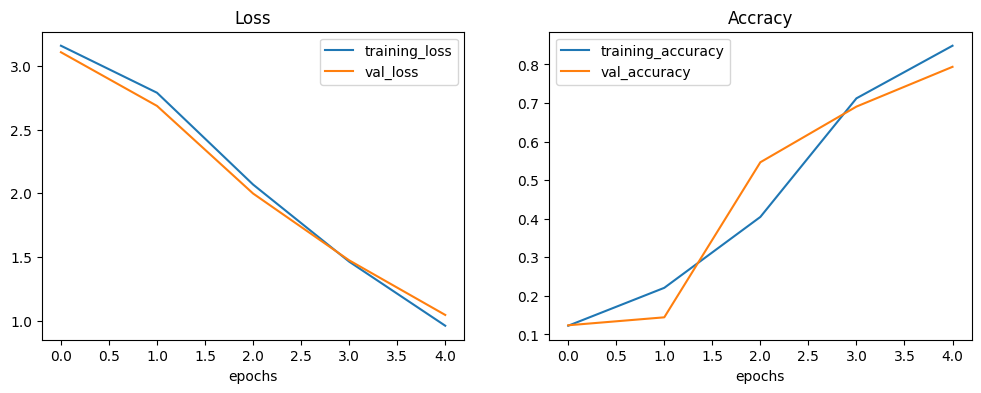

In [59]:
plot_loss_curves(model_3_history)

In [60]:
# Load in saved best performing model_3 and evaluate on test data
model_3 = tf.keras.models.load_model("model_experiments/model_3")
model_3.evaluate(val_sentences, val_labels)

4/4 [==============================] - 1s 56ms/step - loss: 1.0468 - accuracy: 0.7938


[1.046822428703308, 0.7938144207000732]

In [61]:
# Make predictions
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

4/4 [==============================] - 1s 36ms/step


array([[3.23029384e-02, 3.57358083e-02, 6.55404702e-02, 6.01021666e-03,
        7.42320418e-02, 3.07815764e-02, 1.84491053e-02, 1.43183637e-02,
        4.84630279e-02, 2.86525898e-02, 1.79474447e-02, 4.99669947e-02,
        8.69358797e-03, 1.62109081e-02, 4.42825481e-02, 5.31951385e-03,
        6.33088266e-03, 1.74734965e-01, 1.54697383e-03, 2.12272227e-01,
        8.01058114e-03, 2.36648060e-02, 2.79948320e-02, 1.88348873e-03,
        4.66540195e-02],
       [3.33693181e-03, 2.44515073e-02, 5.11921523e-03, 3.88362474e-04,
        1.83356670e-03, 5.02914947e-04, 2.18653485e-01, 1.15992723e-03,
        7.91057944e-02, 6.72885356e-03, 3.82416546e-02, 1.20930718e-02,
        1.36874259e-01, 1.01075560e-01, 1.73168839e-03, 1.34468302e-01,
        1.42705878e-02, 9.42644605e-04, 8.73547196e-02, 7.18809199e-03,
        3.76951694e-02, 4.05280804e-03, 4.04804479e-03, 2.36293282e-02,
        5.50535023e-02],
       [3.46942320e-02, 6.60252199e-02, 7.93129578e-02, 1.16104977e-02,
        6.1215

In [62]:
# Round out predictions and reduce to 1-dimensional array
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10, 25), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0.

In [63]:
# Convert predicted probabilities to integer-encoded labels
model_3_preds = np.argmax(model_3_pred_probs, axis=1)
model_3_preds

array([19,  6, 17, 24, 15, 22, 12, 15, 17, 11, 12, 10, 15,  1,  1, 17, 18,
       15, 22,  1,  1, 11,  7,  9, 14, 23,  6,  3,  6, 10,  1, 19,  3, 23,
       22, 24,  5, 12, 24, 10,  9,  8, 10,  7,  3, 17, 13,  1,  2, 13, 17,
       11, 23,  3, 14,  4,  5,  1,  8, 17,  4, 24, 17,  3, 15, 14, 24,  9,
        8,  6, 10, 16, 10, 10,  8, 17, 22,  7, 17, 13,  7, 17, 10, 20, 24,
       23, 16, 11, 23, 18, 17,  8, 14, 22, 14, 24, 11])

##Model 4: TensorFlow Hub Pretrained Feature Extractor

In [64]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder

In [65]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [66]:
# Create model using the Sequential API
model_4 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(num_classes, activation="softmax")
], name="model_4_USE")

# Compile model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_4.summary()

Model: "model_4_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
Total params: 256832281 (979.74 MB)
Trainable params: 34457 (134.60 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [67]:
# Train a classifier on top of pretrained embeddings
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder"),
                                                                     create_model_checkpoint(model_name='model_4')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240415-135659
Epoch 1/5
28/28 [==============================] - 17s 432ms/step - loss: 3.1292 - accuracy: 0.1919 - val_loss: 3.0592 - val_accuracy: 0.1856
Epoch 2/5
28/28 [==============================] - 11s 409ms/step - loss: 2.8684 - accuracy: 0.3283 - val_loss: 2.8621 - val_accuracy: 0.1959
Epoch 3/5
28/28 [==============================] - 14s 510ms/step - loss: 2.5810 - accuracy: 0.3584 - val_loss: 2.6129 - val_accuracy: 0.3093
Epoch 4/5
28/28 [==============================] - 11s 422ms/step - loss: 2.2840 - accuracy: 0.5179 - val_loss: 2.3567 - val_accuracy: 0.4227
Epoch 5/5
28/28 [==============================] - 19s 695ms/step - loss: 1.9939 - accuracy: 0.6069 - val_loss: 2.0993 - val_accuracy: 0.5258


##Predicting on resume from the wild

In [68]:
# Turn resume into string
resume = '''I am an experienced software developer with expertise in Java, Python, and web development.
I have worked on various projects ranging from backend systems to front-end interfaces. My previous experience includes working as a Java
developer at XYZ Tech and as a web developer at ABC Inc. I am highly motivated, quick learner,
and passionate about writing clean and efficient code.
In my free time, I enjoy contributing to open-source projects and exploring new technologies.'''

In [69]:
def predict_on_sentence(model, sentence, class_names):
    """
    Uses model to make a prediction on sentence for multiclass classification.

    Returns the sentence, the predicted label, the predicted class name, and the prediction probability.
    """
    pred_prob = model.predict([sentence])
    pred_label = pred_prob.argmax(axis=1)[0]
    pred_class_name = class_names[pred_label]
    pred_prob = pred_prob[0][pred_label]
    print(f"Predicted Label: {pred_label}, Class: {pred_class_name}, Probability: {pred_prob}")
    print(f"Sentence:\n{sentence}")

In [70]:
# Make a prediction on resume from the wild
predict_on_sentence(model=model_1,
                    sentence=resume,
                    class_names=class_names)

1/1 [==============================] - 0s 357ms/step
Predicted Label: 20, Class: Python Developer, Probability: 0.19830872118473053
Sentence:
I am an experienced software developer with expertise in Java, Python, and web development.
I have worked on various projects ranging from backend systems to front-end interfaces. My previous experience includes working as a Java
developer at XYZ Tech and as a web developer at ABC Inc. I am highly motivated, quick learner,
and passionate about writing clean and efficient code.
In my free time, I enjoy contributing to open-source projects and exploring new technologies.


In [71]:
resume_2 = """I am a skilled web designer with expertise in HTML, CSS, JavaScript, and various front-end frameworks such as React and Vue.js. Over the past five years, I have worked on a wide range of projects, including designing responsive and user-friendly websites for clients across different industries. My portfolio includes e-commerce platforms, corporate websites, and personal blogs.

In my previous role at XYZ Web Solutions, I led a team of designers and developers to create visually appealing and functional websites that meet the client's requirements. I am proficient in using design tools like Adobe Photoshop and Illustrator to create mockups and prototypes. I also have experience in optimizing website performance and ensuring cross-browser compatibility.

I am passionate about staying updated with the latest trends and technologies in web design and constantly strive to improve my skills. I have excellent communication and teamwork skills, allowing me to collaborate effectively with clients and stakeholders to deliver high-quality projects on time.

Outside of work, I enjoy attending design conferences and participating in online communities to share knowledge and learn from others in the industry.
"""

In [72]:
resume_3 = """I am a skilled web designer."""

In [73]:
# Make a prediction on resume from the wild
predict_on_sentence(model=model_1,
                    sentence=resume_3,
                    class_names=class_names)

1/1 [==============================] - 0s 44ms/step
Predicted Label: 15, Class: Java Developer, Probability: 0.0809616819024086
Sentence:
I am a skilled web designer.


##Model 5

In [74]:
from tensorflow.keras.layers import Dropout

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(128, return_sequences=True)(x)  # Increased LSTM units
x = Dropout(0.5)(x)  # Added dropout layer
x = layers.LSTM(64)(x)
x = Dropout(0.5)(x)  # Added dropout layer
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")

In [75]:
# Compile model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjusted learning rate
                metrics=["accuracy"])

In [76]:
# Fit model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=10,  # Increased number of epochs
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "LSTM"),
                                         create_model_checkpoint(model_name='model_5')])

Saving TensorBoard log files to: model_logs/LSTM/20240415-135825
Epoch 1/10
28/28 [==============================] - 34s 890ms/step - loss: 2.9014 - accuracy: 0.2347 - val_loss: 2.6095 - val_accuracy: 0.2784
Epoch 2/10
28/28 [==============================] - 20s 738ms/step - loss: 1.9908 - accuracy: 0.4775 - val_loss: 1.8371 - val_accuracy: 0.5052
Epoch 3/10
28/28 [==============================] - 19s 679ms/step - loss: 1.3228 - accuracy: 0.6948 - val_loss: 1.2806 - val_accuracy: 0.7216
Epoch 4/10
28/28 [==============================] - 19s 701ms/step - loss: 0.9342 - accuracy: 0.8335 - val_loss: 0.9432 - val_accuracy: 0.8454
Epoch 5/10
28/28 [==============================] - 27s 974ms/step - loss: 0.6322 - accuracy: 0.9179 - val_loss: 0.6350 - val_accuracy: 0.8660
Epoch 6/10
28/28 [==============================] - 19s 688ms/step - loss: 0.4157 - accuracy: 0.9526 - val_loss: 0.4493 - val_accuracy: 0.9278
Epoch 7/10
28/28 [==============================] - 17s 630ms/step - loss: 0.

In [77]:
# Load in saved best performing model_1 and evaluate on test data
model_5 = tf.keras.models.load_model("model_experiments/model_5")
model_5.evaluate(val_sentences, val_labels)

4/4 [==============================] - 5s 112ms/step - loss: 0.1559 - accuracy: 0.9794


[0.15589410066604614, 0.9793814420700073]

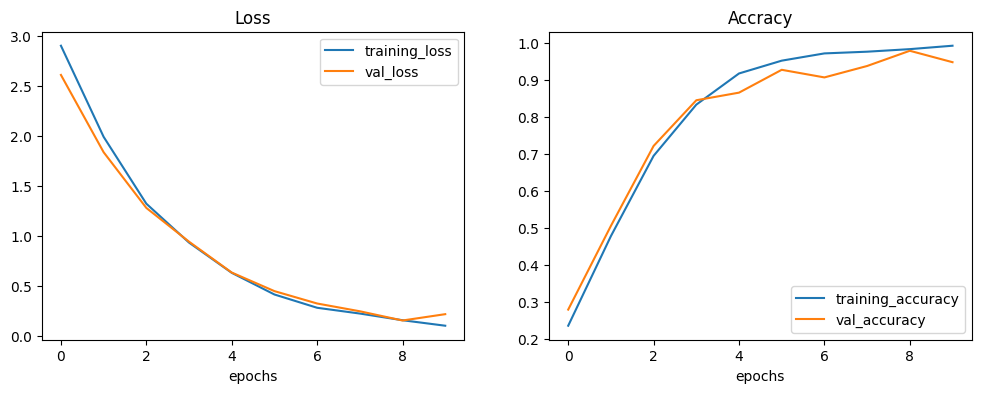

In [78]:
plot_loss_curves(model_5_history)

In [79]:
# Make a prediction on resume from the wild
predict_on_sentence(model=model_5,
                    sentence=resume_3,
                    class_names=class_names)

1/1 [==============================] - 2s 2s/step
Predicted Label: 15, Class: Java Developer, Probability: 0.28906136751174927
Sentence:
I am a skilled web designer.


In [83]:
resume_4 = '''PROFILE

Passionate and dedicated health and fitness professional with over 5 years of experience in personal training, group fitness instruction, and wellness coaching. Certified by the National Academy of Sports Medicine (NASM) as a Certified Personal Trainer (CPT) and Fitness Nutrition Specialist (FNS). Proven track record of helping clients achieve their fitness goals through customized workout plans, nutritional guidance, and motivational support.

EXPERIENCE

Fitness Trainer
FitZone Gym, Anytown, USA
September 2019 - Present

- Conduct one-on-one personal training sessions with clients to assess fitness levels, set goals, and develop personalized workout plans tailored to their needs and preferences.
- Lead group fitness classes including HIIT, strength training, and yoga, providing dynamic and engaging workouts for participants of all fitness levels.
- Educate clients on proper exercise techniques, injury prevention, and the importance of nutrition for overall health and fitness.
- Track client progress, adjust workout plans as needed, and provide ongoing support and motivation to help clients stay committed to their fitness journey.

Wellness Coach
HealthyLiving Wellness Center, Anytown, USA
January 2017 - August 2019

- Provided individualized wellness coaching sessions to clients, focusing on goal setting, stress management, sleep optimization, and healthy lifestyle habits.
- Conducted fitness assessments and developed comprehensive wellness plans addressing clients' physical, emotional, and mental well-being.
- Collaborated with other healthcare professionals, including nutritionists, physical therapists, and mental health counselors, to provide holistic care for clients.
- Organized wellness workshops and seminars on topics such as nutrition, mindfulness, and stress reduction to educate and empower clients to take control of their health.

EDUCATION

Bachelor of Science in Exercise Science
Anytown University, Anytown, USA
Graduated: May 2016

CERTIFICATIONS

- Certified Personal Trainer (CPT), National Academy of Sports Medicine (NASM)
- Fitness Nutrition Specialist (FNS), National Academy of Sports Medicine (NASM)
- CPR and First Aid Certified

SKILLS

- Personalized fitness program design
- Group fitness instruction
- Nutrition coaching and meal planning
- Wellness coaching and goal setting
- Client assessment and progress tracking
- Motivational support and encouragement
- Strong communication and interpersonal skills
'''

In [84]:
# Make a prediction on resume from the wild
predict_on_sentence(model=model_5,
                    sentence=resume_4,
                    class_names=class_names)

1/1 [==============================] - 0s 60ms/step
Predicted Label: 14, Class: Health and fitness, Probability: 0.90383380651474
Sentence:
PROFILE

Passionate and dedicated health and fitness professional with over 5 years of experience in personal training, group fitness instruction, and wellness coaching. Certified by the National Academy of Sports Medicine (NASM) as a Certified Personal Trainer (CPT) and Fitness Nutrition Specialist (FNS). Proven track record of helping clients achieve their fitness goals through customized workout plans, nutritional guidance, and motivational support.

EXPERIENCE

Fitness Trainer
FitZone Gym, Anytown, USA
September 2019 - Present

- Conduct one-on-one personal training sessions with clients to assess fitness levels, set goals, and develop personalized workout plans tailored to their needs and preferences.
- Lead group fitness classes including HIIT, strength training, and yoga, providing dynamic and engaging workouts for participants of all fitnes

In [95]:
resume_5 = """[Your Name]
[Your Address]
[City, State, Zip Code]
[Your Email Address]
[Your Phone Number]

Objective:
Highly skilled DevOps Engineer with over 5 years of experience in designing, implementing, and maintaining CI/CD pipelines, infrastructure automation, and cloud solutions. Proven track record of optimizing development workflows, increasing deployment efficiency, and reducing time to market. Seeking to leverage my expertise to contribute to the success of a forward-thinking tech company.

Education:
Bachelor of Science in Computer Science
[University Name], [City, State]
Graduated: [Month, Year]

Professional Experience:

DevOps Engineer
[Company Name], [City, State]
[Month, Year] - Present

- Design and implement CI/CD pipelines using Jenkins, GitLab CI, or CircleCI to automate the build, test, and deployment processes.
- Manage infrastructure as code using tools such as Terraform, AWS CloudFormation, or Azure Resource Manager to provision and configure cloud resources.
- Implement containerization using Docker and container orchestration using Kubernetes to enable scalable and resilient deployments.
- Monitor and maintain production systems using tools like Prometheus, Grafana, and ELK stack to ensure high availability and performance.
- Collaborate with development and operations teams to troubleshoot issues, optimize performance, and improve reliability.
- Implement security best practices, including role-based access control, encryption, and vulnerability scanning, to protect sensitive data and applications.
- Participate in on-call rotations and incident response activities to ensure timely resolution of production issues.

DevOps Specialist
[Company Name], [City, State]
[Month, Year] - [Month, Year]

- Implemented automated deployment processes for web applications using Ansible, Puppet, or Chef to streamline deployment workflows and reduce manual errors.
- Designed and implemented monitoring solutions using Nagios, Zabbix, or Datadog to proactively identify and address performance bottlenecks and system failures.
- Provided technical guidance and support to development teams on best practices for continuous integration, delivery, and deployment.
- Worked closely with infrastructure teams to design and implement scalable and reliable cloud architectures using AWS, Azure, or Google Cloud Platform.
- Conducted regular code reviews, performance evaluations, and knowledge-sharing sessions to foster a culture of collaboration and continuous improvement.

Skills:
- Proficient in CI/CD tools such as Jenkins, GitLab CI, CircleCI
- Experience with infrastructure as code tools such as Terraform, AWS CloudFormation, Azure Resource Manager
- Knowledge of containerization and orchestration tools such as Docker, Kubernetes
- Familiarity with monitoring and logging tools such as Prometheus, Grafana, ELK stack
- Strong scripting skills in languages like Bash, Python, or Ruby
- Excellent problem-solving and troubleshooting skills
- Strong communication and collaboration skills
- Ability to work effectively in a fast-paced, agile environment

Certifications:
- AWS Certified DevOps Engineer (optional)
- Certified Kubernetes Administrator (CKA) (optional)

References:
Available upon request
"""

In [96]:
# Make a prediction on resume from the wild
predict_on_sentence(model=model_5,
                    sentence=resume_5,
                    class_names=class_names)

1/1 [==============================] - 0s 94ms/step
Predicted Label: 8, Class: DevOps Engineer, Probability: 0.45391061902046204
Sentence:
[Your Name]
[Your Address]
[City, State, Zip Code]
[Your Email Address]
[Your Phone Number]

Objective:
Highly skilled DevOps Engineer with over 5 years of experience in designing, implementing, and maintaining CI/CD pipelines, infrastructure automation, and cloud solutions. Proven track record of optimizing development workflows, increasing deployment efficiency, and reducing time to market. Seeking to leverage my expertise to contribute to the success of a forward-thinking tech company.

Education:
Bachelor of Science in Computer Science
[University Name], [City, State]
Graduated: [Month, Year]

Professional Experience:

DevOps Engineer
[Company Name], [City, State]
[Month, Year] - Present

- Design and implement CI/CD pipelines using Jenkins, GitLab CI, or CircleCI to automate the build, test, and deployment processes.
- Manage infrastructure as 

In [98]:
model_5.save("resume_screening_model", save_format='tf')

In [99]:
import tensorflow as tf

# Load the model
loaded_model = tf.keras.models.load_model("resume_screening_model")

4/4 [==============================] - 3s 51ms/step - loss: 0.1559 - accuracy: 0.9794


[0.15589410066604614, 0.9793814420700073]

In [101]:
loaded_model_results = loaded_model.evaluate(val_sentences, val_labels)

4/4 [==============================] - 0s 55ms/step - loss: 0.1559 - accuracy: 0.9794


In [102]:
# Assuming model_5 is already defined and trained
model_5_results = model_5.evaluate(val_sentences, val_labels)

4/4 [==============================] - 0s 55ms/step - loss: 0.1559 - accuracy: 0.9794


In [104]:
# Compare the results using np.isclose()
are_results_close = np.isclose(loaded_model_results, model_5_results).all()
are_results_close

True

In [114]:
resume_6 = '''Jane Smith

456 Elm Street, Cityville, USA | (555) 123-4567 | jane.smith@email.com

Objective:
Experienced and detail-oriented Database Administrator with a proven track record of managing large-scale database environments. Skilled in database design, implementation, optimization, and troubleshooting. Seeking a challenging role where I can leverage my expertise to contribute to the success of the organization.

Education:

    Bachelor of Science in Computer Engineering
    City University, Cityville, USA
    Graduated: May 20XX

Professional Experience:

Senior Database Administrator
Tech Innovations Inc., Cityville, USA
June 20XX - Present

    Manage and administer Microsoft SQL Server and MongoDB database systems, including installation, configuration, and maintenance.
    Design and implement database schemas, tables, indexes, and stored procedures to meet application requirements.
    Optimize database performance through query optimization, indexing strategies, and database tuning techniques.
    Implement database security measures, including access controls, encryption, and auditing, to ensure data protection and compliance.
    Develop and maintain database backup and recovery procedures to ensure data integrity and availability.
    Monitor database performance and resource utilization using performance monitoring tools and implement proactive measures to prevent performance bottlenecks.
    Provide technical support and troubleshooting for database-related issues and collaborate with development and infrastructure teams to resolve them.
    Document database configurations, procedures, and best practices.

Database Administrator
Data Solutions Ltd., Cityville, USA
January 20XX - May 20XX

    Assisted in the installation, configuration, and maintenance of Oracle and MySQL database systems.
    Created and managed database objects, such as tables, views, indexes, and sequences, as per application requirements.
    Implemented database security policies, including user authentication, role-based access control, and data encryption.
    Performed database backups and restores using RMAN and MySQL utilities to ensure data availability and disaster recovery.
    Monitored database performance and executed performance tuning activities, such as index optimization and SQL query tuning.
    Conducted database capacity planning and implemented scalability solutions to accommodate growing data volumes.
    Provided technical support and troubleshooting for database-related issues, including performance bottlenecks and data corruption.

Skills:

    Database Management Systems: Microsoft SQL Server, Oracle, MySQL, MongoDB
    Database Design and Implementation
    Database Administration and Performance Tuning
    Backup and Recovery
    Database Security and Compliance
    SQL Query Optimization
    Scripting Languages: SQL, PL/SQL, T-SQL, PowerShell
    Operating Systems: Windows Server, Linux

Certifications:

    Microsoft Certified: Azure Database Administrator Associate
    Oracle Certified Professional (OCP)
    MongoDB Certified DBA Associate
'''

In [117]:
# Make a prediction on resume from the wild
predict_on_sentence(model=model_5,
                    sentence=resume_6,
                    class_names=class_names)

1/1 [==============================] - 0s 60ms/step
Predicted Label: 7, Class: Database, Probability: 0.3206905126571655
Sentence:
Jane Smith

456 Elm Street, Cityville, USA | (555) 123-4567 | jane.smith@email.com

Objective:
Experienced and detail-oriented Database Administrator with a proven track record of managing large-scale database environments. Skilled in database design, implementation, optimization, and troubleshooting. Seeking a challenging role where I can leverage my expertise to contribute to the success of the organization.

Education:

    Bachelor of Science in Computer Engineering
    City University, Cityville, USA
    Graduated: May 20XX

Professional Experience:

Senior Database Administrator
Tech Innovations Inc., Cityville, USA
June 20XX - Present

    Manage and administer Microsoft SQL Server and MongoDB database systems, including installation, configuration, and maintenance.
    Design and implement database schemas, tables, indexes, and stored procedures to 